In [7]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [11]:
class bmi_state(TypedDict):
    height: float
    weight: float
    bmi: float
    category: str


In [12]:
def calculate_bmi(state: bmi_state) -> bmi_state:
    """Calculate BMI based on height and weight."""
    if state['height'] <= 0:
        raise ValueError("Height must be greater than zero.")
    state['bmi'] = state['weight'] / (state['height'] ** 2) ## partial updat of our state
    return state 

def Label_bmi(state: bmi_state) -> bmi_state:
    """Label the BMI category based on the calculated BMI."""
    if state['bmi'] < 18.5:
        state['category']= "Underweight" 
    elif 18.5 <= state['bmi'] < 24.9:
        state['category']= "Normal weight"
    elif 25 <= state['bmi'] < 29.9:
        state['category']= "Overweight"
    else:
        state['category']= "Obesity"
    return state

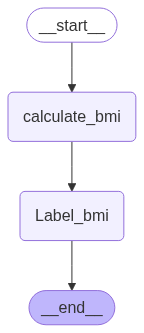

In [13]:
## Defining Graph
graph=StateGraph(bmi_state)

## Add nodes to ur graph
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("Label_bmi", Label_bmi)

## add edge to ur graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "Label_bmi")
graph.add_edge("Label_bmi", END)


## compilr the graph
workflow=graph.compile() 

from IPython.display import display, Image
display(Image(workflow.get_graph().draw_mermaid_png()))

In [14]:
workflow.invoke({"height": 1.75, "weight": 70})

{'height': 1.75,
 'weight': 70,
 'bmi': 22.857142857142858,
 'category': 'Normal weight'}